## Mercedes-Benz Greener Manufacturing (kaggle)

В этом соревновании Daimler ставит перед нами задачу о сокращении времени, которое автомобили проводят на испытательном стенде. Участники будут работать с набором данных, представляющим различные варианты характеристик автомобилей Mercedes-Benz, чтобы спрогнозировать время, необходимое для прохождения тестирования. Уменьшение времени работы алгоритма сможет способствовать также снижению выбросов углекислого газа без снижения стандартов Daimler.

Набор данных содержит анонимизированный набор переменных (пользовательские функции) в автомобиле Mercedes. Например, переменная может быть 4WD, это может быть добавленная пневматическая подвеска или головной дисплей.

В наборе данных есть как категориальные, так и числовые признаки. Числовые признаки имеют двоичный тип 0/1

y - переменная, которую необходимо предсказать, это время (в секундах), которое потребовалось автомобилю, чтобы пройти тестирование

### Импорт необходимых библиотек 

In [265]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [266]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

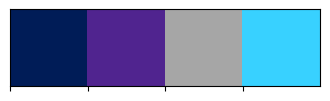

In [267]:
colors = ['#001c57','#50248f','#a6a6a6','#38d1ff']
sns.palplot(sns.color_palette(colors))

### 1. Информация о данных

In [268]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [269]:
print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [270]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [271]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### Соединим тренировочные и тестовые данные

In [272]:
df = train.copy()

In [273]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


### 2. Exploratory Data Analysis

#### 2.1 Целевая переменная

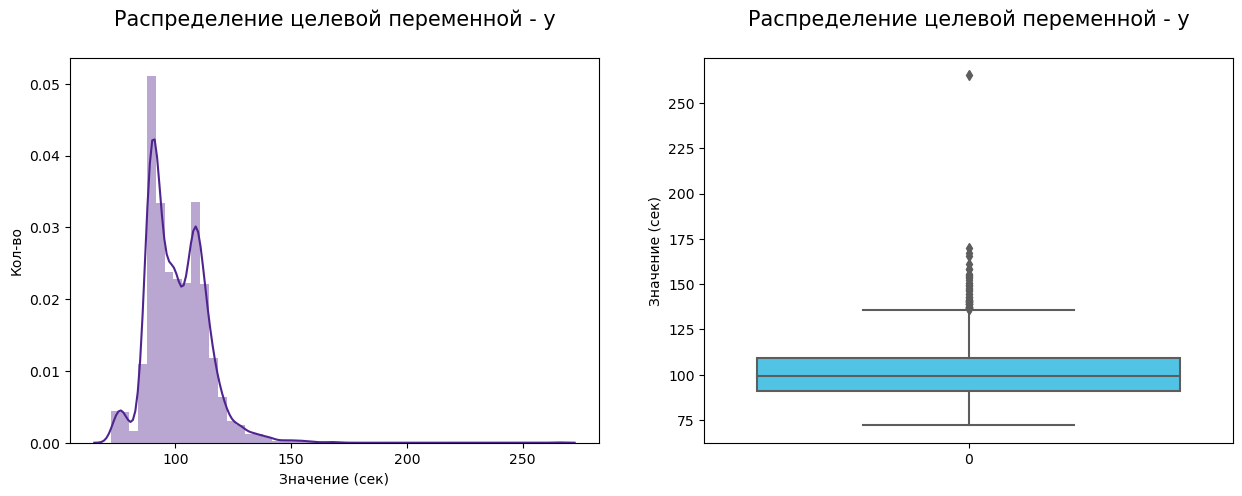

In [274]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df.y.values, bins=50, color=colors[1])
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение (сек)'); plt.ylabel('Кол-во');

plt.subplot(122)
sns.boxplot(df.y.values, color=colors[3])
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.ylabel('Значение (сек)'); 

In [275]:
df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

Из полученных графиков можно сделать вывод, что целевая переменная распределена примерно от 72 до 140 секунд. Первый и третий квантили лежат примерно от 91 до 109 сек, медиана в 100 сек. Заметим также, что есть выбросы, начиная от 140 сек, которые мы можем удалить из нашей выборки, так как они могут добавлять шум в наш алгоритм


#### 2.2 Рассмотрим признаки

In [276]:
df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

369 признаков типа int- являются двоичными 0/1. Посмотрим на них 

In [277]:
df.dtypes[df.dtypes=='int64']

ID      int64
X10     int64
X11     int64
X12     int64
X13     int64
        ...  
X380    int64
X382    int64
X383    int64
X384    int64
X385    int64
Length: 369, dtype: object

In [278]:
df[df.dtypes[df.dtypes=='int64'].index]

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Целевая переменная

In [279]:
df.dtypes[df.dtypes=='float']

y    float64
dtype: object

Категориальные признаки

In [280]:
df.dtypes[df.dtypes=='object']

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

#### Рассмотрим какие значения содержаться в категориальных признаках

In [281]:
obj = df.dtypes[df.dtypes=='object'].index
obj_=[]
for i in obj:
    print(f"Признак - {i} : {df[i].unique()} \n")
    obj_.append(i)

Признак - X0 : ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 

Признак - X1 : ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 

Признак - X2 : ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 

Признак - X3 : ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 

Признак - X4 : ['d' 'b' 'c' 'a'] 

Признак - X5 : ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 

Признак - X6 : ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'] 

Признак - X8 : ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c'] 



#### Пропущенные значения

In [282]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

Пропущенных значений нет

### 2.3 Удалим дубликаты

In [283]:
df = df.T.drop_duplicates().T

In [284]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,0,0,1,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,0,0,1,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,0,0,1,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,1,0,0,0,0,0,0,0,0


### 2.4 Категориальные данные

Постороим boxplot для 8 категариальных признаков в зависимости от целевой переменной

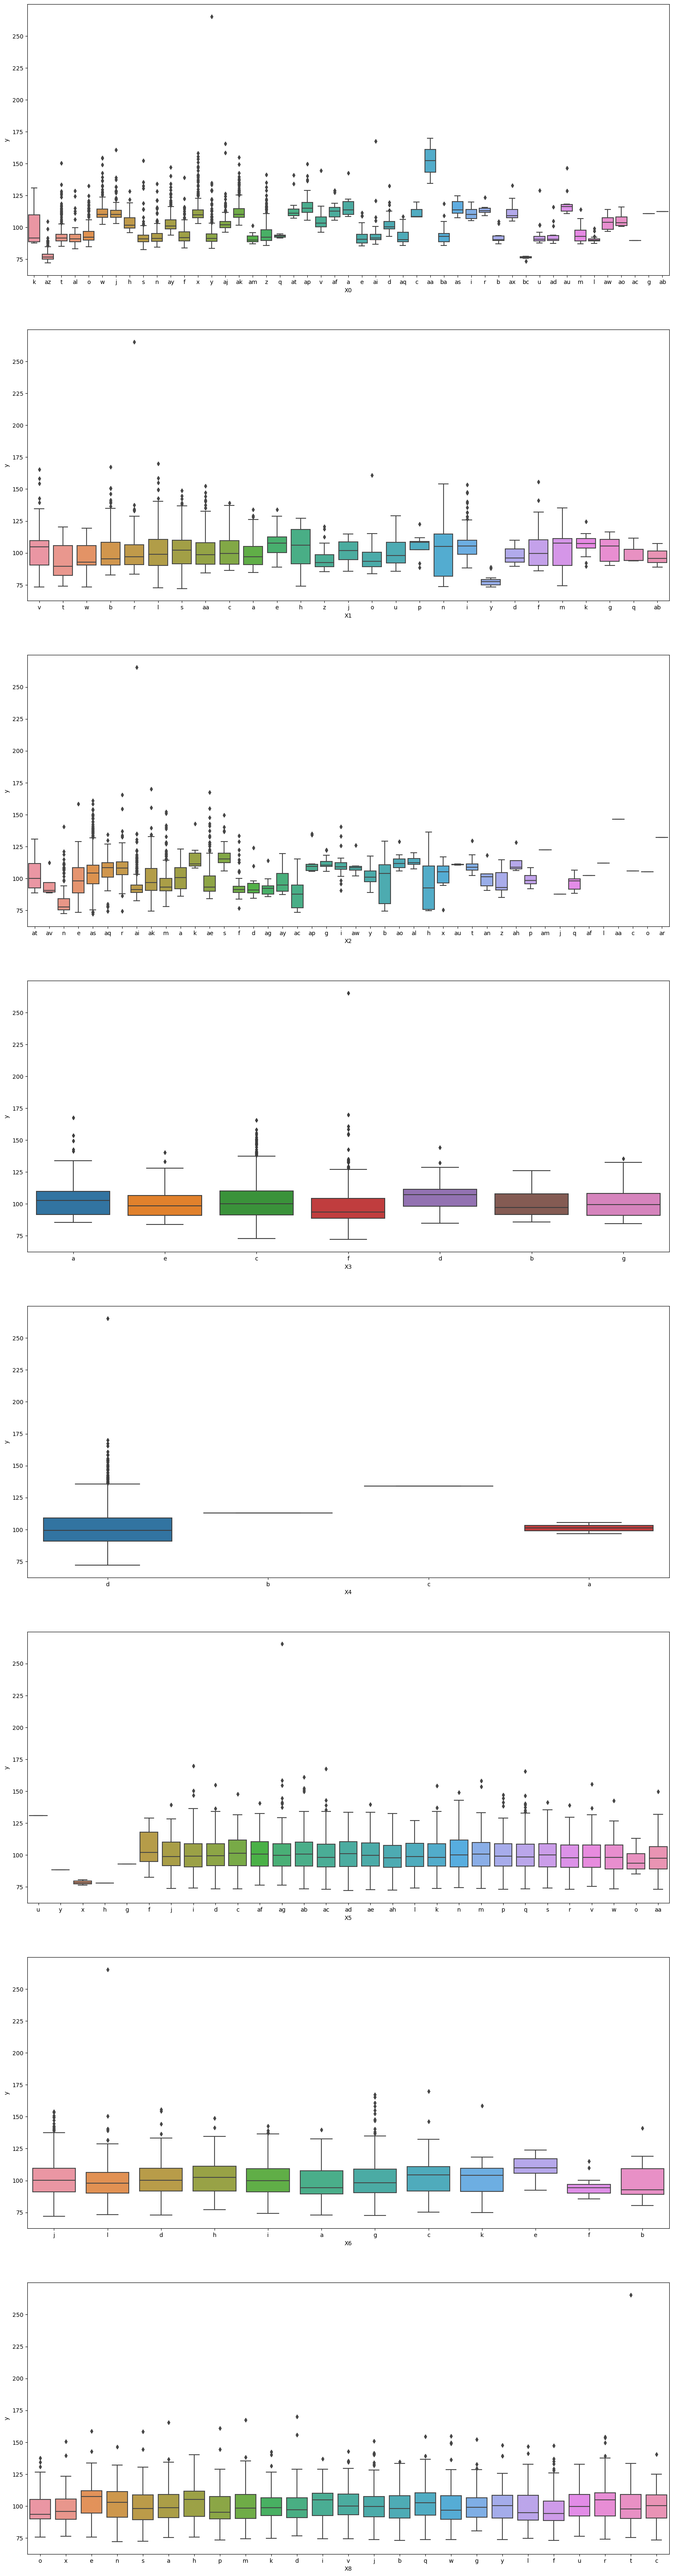

In [285]:
fig,ax = plt.subplots(len(obj), figsize=(20,80))

for i, col in enumerate(obj):
    sns.boxplot(x=col, y='y', data=df, ax=ax[i])

#### Выводы по графикам:

1) Поскольку есть необходимость в снижении времени тестирования автомобиля, то наилучшими значениями в переменных, при которых это время минимально являются -- az и bc (признак - X0), y ( признак - X1), n (признак - X2), x и h (признак - X5)

Здесь мы можем выдвинуть гипотезу о влиянии этих переменных на у. Нужно проверить

2) Признаки X3, X5, X6, X8 имеют похожие распределения значений, где нет особых различий внутри фичи между значениями в разрезе средних и квантилей

3) X0 и X2 имеют наибольшее разнообразие внутри переменных, что может говорить об большей полезности данных фичей

### 2.4 Числовые переменные

In [286]:
num = df.dtypes[df.dtypes=='int64'].index[1:]

In [287]:
num

Index([], dtype='object')

Мы имеем набор числовых переменных, где значение задано 1, либо 0, поэтому нет необходимости проводить объемный ананлиз. В данном случае рассмотрим, меняется ли значение показателей внутри переменных, для этого исследуем дисперсию данных переменных.

In [288]:
non_num = []
for i in num:
    if (train[i].var()==0):
        print(i, train[i].var())
        non_num.append(i)

В полученных признаках дисперсия на всем датасете 0, тоесть один значения в столбцах 0 или 1. Из анализа мы можем их удалить, так как они никак не будут влиять на целевую переменную, тем самым мы повышаем происзводительность работы алгоритма

In [289]:
df = df.drop(columns=non_num, axis=1)

In [290]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### 2.5 Корреляция

Посмотрим на корреляцию категориальных данных. Для этого, для начала преобразуем их использовав LabelEncoder()

In [291]:
df1 = df.copy()

In [292]:
for i in obj:
    le = LabelEncoder()
    le.fit(list(df1[i].values) + list(df1[i].values))
    df1[i] = le.transform(list(df1[i].values))

In [293]:
df1[obj_].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


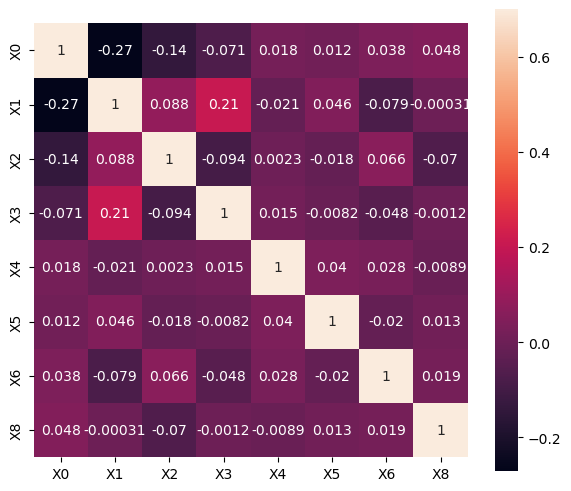

In [294]:
corr = df1[train.columns[1:10]].corr()
fig,ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, vmax=.7, square=True,annot=True);

Среди категориальных переменных не обнаружена сильная зависимость с таргетом y. Однако есть слабая корреляция между признаками (X1 и X0, X1 и X3)

Поскольку в данных очень много числовых признаков, то строить корреляционную таблицу нет смысла, она будет очень большой

In [295]:
threshold = 0.5 # Порог корреляции

corr_all = df.drop(columns=obj, axis=1).corr()
corr_all.loc[:,:] =  np.tril(corr_all, k=-1) 

In [296]:
already_in_set = set()
result = []
for col in corr_all:
    perfect_corr = corr_all[col][corr_all[col] >= threshold].index.tolist()
    if perfect_corr and col not in already_in:
        already_in_set.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

In [297]:
result

[]

Из полученных данных, видно, что заметной корреляции между числовыми признаками и таргетом также нет (т.е больше 0.5) тк мы установили именно такой порог)

### 3. Предварительная обработка данных

In [298]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### Сделаем one hot encoding категориальных признаков

In [299]:
df = pd.get_dummies(df, columns=obj_)

In [300]:
df

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,8412,109.22,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


У нас также есть ID, который может нести какую-то информацию, сделаем стандартизацию 

In [301]:
col = ["ID"]
def get_scale(df,col, model):
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [302]:
df = get_scale(df, col, MinMaxScaler())

In [303]:
df

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0.000000,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000713,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000832,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.001069,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.001544,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.998574,107.39,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0.998693,108.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0.999406,109.22,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0.999762,87.48,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 4. Разобьем данные на train и test

In [304]:
df = df.drop('y',  axis=1)

In [305]:
train = df.iloc[0:train.shape[0],:]

In [306]:
X_train = train.values
X_test = test.values

In [307]:
Y_train = df1.iloc[0:train.shape[0],:]

In [308]:
Y_train = Y_train['y'].values.ravel()

In [309]:
Y_train

array([130.81, 88.53, 76.26, ..., 109.22, 87.48, 110.85], dtype=object)

In [310]:
from sklearn.model_selection import train_test_split
X_train_, X_val, y_train_, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

### 5,6,7 Применение алгоритмов и их оценка 

#### Метод опорных веторов SVM

In [311]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

Парметры, подобранные с помощью RandomizedSearchCV

In [312]:
epsilon=6.53
C=0.00851 
kernel = 'poly'
coef0=0.5 
degree=2
gamma=0.24155 

if gamma == 0:
      gamma='auto'

SVM_reg=SVR(kernel=kernel, epsilon=epsilon, C=C, gamma=gamma,
            degree=degree, coef0 = coef0)

Обучим модель с учетом найденных гиперпараметров и оценим качество ее работы

In [313]:
SVM_reg.fit(X_train, Y_train)
y_predict=SVM_reg.predict(X_val)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_val,y_predict))
print('RMSE: %.1f' % mse(y_val,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_val,y_predict))

Ошибка на тестовых данных
MSE: 92.1
RMSE: 9.6
R2 : 0.4851


RMSE: 9.6 - оно дает нам представление о среднем расстоянии между наблюдаемыми значениями данных и прогнозируемыми значениями данных, поскольку значения у лежат в диапазоне от 72 до 260 секунд, то ошибка 9.6 не является сильно значимой. R2 : 0.4851 - низкий. Качество модели желает быть лучшего, скорее всего это связано со слабой связью фичей с таргетом или стоит рассмотреть ансамбли. Посмотрим как покажет себя Дерево решений

Также в процессе анализа корреляционной таблицы было обнаружено, что признаки X1 и X0, X1 и X3 - слабо коррелируют, при удалении их из датасета, улучшение качества работы модели обнаружено не было

Подобор гиперпараметров

In [50]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [51]:
C_range = loguniform(1e-4, 1e1) 
gamma_range = loguniform(1e-4, 1e0)
C_range_poly = loguniform(1e-4, 1e2)
epsilon = stats.uniform(0, 1000)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range, 'epsilon': epsilon},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5,6], 'C': C_range_poly, 'epsilon': epsilon}]


n_iter_search = 20
SVR_search = RandomizedSearchCV(estimator = SVR(coef0=1), verbose = 3,
                          param_distributions=tuned_parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42),n_iter = n_iter_search)

SVR_search.fit(X_train_, y_train_)

SVRbest=SVR_search.best_estimator_

SVRbest.fit(X_train_, y_train_);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.006588019913101941, epsilon=922.2519420483147, gamma=0.0054200775047449495, kernel=rbf;, score=-2.271 total time=   0.0s
[CV 2/5] END C=0.006588019913101941, epsilon=922.2519420483147, gamma=0.0054200775047449495, kernel=rbf;, score=-2.281 total time=   0.0s
[CV 3/5] END C=0.006588019913101941, epsilon=922.2519420483147, gamma=0.0054200775047449495, kernel=rbf;, score=-2.753 total time=   0.0s
[CV 4/5] END C=0.006588019913101941, epsilon=922.2519420483147, gamma=0.0054200775047449495, kernel=rbf;, score=-2.264 total time=   0.0s
[CV 5/5] END C=0.006588019913101941, epsilon=922.2519420483147, gamma=0.0054200775047449495, kernel=rbf;, score=-1.760 total time=   0.0s
[CV 1/5] END C=0.07192207000196708, epsilon=643.5163072703466, gamma=0.0013837457801606269, kernel=rbf;, score=-2.271 total time=   0.0s
[CV 2/5] END C=0.07192207000196708, epsilon=643.5163072703466, gamma=0.0013837457801606269, kernel=rbf;, score=

[CV 4/5] END C=6.518258826836461, epsilon=265.2633741316266, gamma=0.0003149460187729471, kernel=rbf;, score=-2.264 total time=   0.0s
[CV 5/5] END C=6.518258826836461, epsilon=265.2633741316266, gamma=0.0003149460187729471, kernel=rbf;, score=-1.760 total time=   0.0s
[CV 1/5] END C=0.0008771981126737906, degree=5, epsilon=96.91661997101342, kernel=poly;, score=-2.271 total time=   0.0s
[CV 2/5] END C=0.0008771981126737906, degree=5, epsilon=96.91661997101342, kernel=poly;, score=-2.281 total time=   0.0s
[CV 3/5] END C=0.0008771981126737906, degree=5, epsilon=96.91661997101342, kernel=poly;, score=-2.753 total time=   0.0s
[CV 4/5] END C=0.0008771981126737906, degree=5, epsilon=96.91661997101342, kernel=poly;, score=-2.264 total time=   0.0s
[CV 5/5] END C=0.0008771981126737906, degree=5, epsilon=96.91661997101342, kernel=poly;, score=-1.760 total time=   0.0s
[CV 1/5] END C=0.004537219273156465, epsilon=57.53272620356975, gamma=0.0069483718332178646, kernel=rbf;, score=-2.271 total 

In [52]:
SVRbest

SVR(C=0.17887253843496279, coef0=1, degree=6, epsilon=17.36216515636069,
    kernel='poly')

### Рассмотрим Деревья решений

In [314]:
from sklearn.tree import DecisionTreeRegressor

In [315]:
from sklearn import metrics

Сделаем ограничение на колличество значений в листе, пусть max_depth=3, затем проверим с помощью GridSearchCV

In [316]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [317]:
tree_reg.fit(X_train_, y_train_)

DecisionTreeRegressor(max_depth=3)

In [318]:
y_test_pred = tree_reg.predict(X_val)

In [319]:
print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_val,y_test_pred))
print('RMSE: %.1f' % mse(y_val,y_test_pred,squared=False))
print('R2 : %.4f' %  r2_score(y_val,y_test_pred))

Ошибка на тестовых данных
MSE: 97.6
RMSE: 9.9
R2 : 0.4542


RMSE: 9.5 - совпадает со значением полученным при использовании SVM и как говорилось ранее, значения таргета лежат в диапазоне от 72 до 260.  R2- score имеет немного большее значение по сравнению с SVM.  

Примениим GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10, None]}

In [60]:
rfr = DecisionTreeRegressor(max_depth=1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)

In [61]:
g_search.fit(X_train_, y_train_);

print(g_search.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END ...max_depth=1;, score=(train=0.401, test=0.369) total time=   0.0s
[CV 2/3] END ...max_depth=1;, score=(train=0.385, test=0.401) total time=   0.0s
[CV 3/3] END ...max_depth=1;, score=(train=0.386, test=0.399) total time=   0.0s
[CV 1/3] END ...max_depth=2;, score=(train=0.544, test=0.508) total time=   0.0s
[CV 2/3] END ...max_depth=2;, score=(train=0.536, test=0.512) total time=   0.0s
[CV 3/3] END ...max_depth=2;, score=(train=0.530, test=0.535) total time=   0.0s
[CV 1/3] END ...max_depth=3;, score=(train=0.612, test=0.588) total time=   0.0s
[CV 2/3] END ...max_depth=3;, score=(train=0.609, test=0.582) total time=   0.0s
[CV 3/3] END ...max_depth=3;, score=(train=0.606, test=0.595) total time=   0.0s
[CV 1/3] END ...max_depth=4;, score=(train=0.635, test=0.589) total time=   0.0s
[CV 2/3] END ...max_depth=4;, score=(train=0.635, test=0.492) total time=   0.0s
[CV 3/3] END ...max_depth=4;, score=(train=0.631

Лучшее качество при параметре 'max_depth': 3

Дерево решений на наших данных показало себя немного лучше, чем SVM. Результаты работы моделей не показывают высоких результатов, это в свою очередь, может быть связано со слабой связью признаков с таргетом (что мы также могли увидеть при построении матрицы корреляции). Скорее всего ансамблевые алгоритмы смогут показать более высокое качество, в силу того, что деревья лучше показывают себя именно в ансамблевых алгоритмах, широко охватывая всевозможные варианты исходов. 

## Ансамблевые методы

### Random Forest

In [320]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

#### Гипермараметры:
- "Max_depth" - тот гиперпараметр представляет максимальный уровень (глубину) каждого дерева в модели случайного леса. Более глубокое дерево показывает хорошие результаты и собирает много информации об обучающих данных, но плохо поддается обобщению для тестовых данных

- "Max_features" - Максимальное количество признаков, которое модели случайного леса разрешается опробовать при каждом разбиении 

- "N_estimators" - Количество деревьев решений в лесу

- "Min_samples_leaf" - Минимальное количество образцов, необходимое для нахождения в листовом узле каждого дерева. В Scikit-Learn значение по умолчанию равно 1

- "Min_samples_split" - Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева. В Scikit-Learn значение по умолчанию равно 2

Пространство гиперпараметров

In [258]:
grid_space={'max_depth':[1,2,3,5,10,None],
              'n_estimators':[100, 200,300,400],
              'max_features':[7,10,14,21],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

#### Запуск поиска по сетке

In [252]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='r2', verbose = 3, return_train_score=True)
model_grid = grid.fit(X_train_, y_train_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV 1/3] END max_depth=1, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=1, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=1, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=1, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=1, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=1, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=1, max_features=7, 

[CV 1/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.116, test=0.109) total time=   0.3s
[CV 2/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.127, test=0.145) total time=   0.3s
[CV 3/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.135, test=0.123) total time=   0.3s
[CV 1/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=0.118, test=0.109) total time=   0.5s
[CV 2/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=0.107, test=0.122) total time=   0.4s
[CV 3/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=0.125, test=0.111) total time=   0.4s
[CV 1/3] END max_depth=1, max_features=7, min_samples_leaf=2, min_samples_split=3,

[CV 1/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.120, test=0.111) total time=   0.1s
[CV 2/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.165, test=0.188) total time=   0.1s
[CV 3/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.156, test=0.139) total time=   0.1s
[CV 1/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.150, test=0.141) total time=   0.3s
[CV 2/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.142, test=0.162) total time=   0.2s
[CV 3/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.149, test=0.130) total time=   0.4s
[CV 1/3] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.148, test=0.137) total time=   0.4s
[CV 2/3] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.137, test=0.154) total time=   0.4s
[CV 3/3] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.153, test=0.136) total time=   0.4s
[CV 1/3] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.141, test=0.131) total time=   0.6s
[CV 2/3] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.148, test=0.166) total time=   0.6s
[CV 3/3] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.146, test=0.129) total time=   0.6s
[CV 1/3] END max_depth=1, max_features=10, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.181, test=0.169) total time=   0.2s
[CV 2/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.204, test=0.233) total time=   0.2s
[CV 3/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.195, test=0.176) total time=   0.2s
[CV 1/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.182, test=0.170) total time=   0.3s
[CV 2/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.154, test=0.176) total time=   0.3s
[CV 3/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.171, test=0.153) total time=   0.3s
[CV 1/3] END max_depth=1, max_features=14, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=1, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.184, test=0.170) total time=   0.3s
[CV 2/3] END max_depth=1, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.146, test=0.167) total time=   0.4s
[CV 3/3] END max_depth=1, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.185, test=0.169) total time=   0.4s
[CV 1/3] END max_depth=1, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.175, test=0.162) total time=   0.5s
[CV 2/3] END max_depth=1, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.164, test=0.187) total time=   0.5s
[CV 3/3] END max_depth=1, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.177, test=0.157) total time=   0.7s
[CV 1/3] END max_depth=1, max_features=14, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.223, test=0.208) total time=   0.1s
[CV 2/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.198, test=0.224) total time=   0.1s
[CV 3/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.210, test=0.191) total time=   0.1s
[CV 1/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.203, test=0.188) total time=   0.3s
[CV 2/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.204, test=0.230) total time=   0.3s
[CV 3/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.226, test=0.210) total time=   0.2s
[CV 1/3] END max_depth=1, max_features=21, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=1, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.207, test=0.192) total time=   0.4s
[CV 2/3] END max_depth=1, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.204, test=0.230) total time=   0.4s
[CV 3/3] END max_depth=1, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.210, test=0.190) total time=   0.3s
[CV 1/3] END max_depth=1, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.210, test=0.195) total time=   0.5s
[CV 2/3] END max_depth=1, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.205, test=0.229) total time=   0.5s
[CV 3/3] END max_depth=1, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.222, test=0.206) total time=   0.5s
[CV 1/3] END max_depth=1, max_features=21, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.218, test=0.202) total time=   0.1s
[CV 2/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.204, test=0.229) total time=   0.1s
[CV 3/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.214, test=0.192) total time=   0.1s
[CV 1/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.211, test=0.195) total time=   0.2s
[CV 2/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.191, test=0.215) total time=   0.2s
[CV 3/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.223, test=0.200) total time=   0.3s
[CV 1/3] END max_depth=2, max_features=7, min_samples_leaf=1, min_samples_split=2,

[CV 1/3] END max_depth=2, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.225, test=0.208) total time=   0.3s
[CV 2/3] END max_depth=2, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.205, test=0.229) total time=   0.4s
[CV 3/3] END max_depth=2, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.213, test=0.188) total time=   0.4s
[CV 1/3] END max_depth=2, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.223, test=0.208) total time=   0.5s
[CV 2/3] END max_depth=2, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.212, test=0.236) total time=   0.5s
[CV 3/3] END max_depth=2, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.220, test=0.195) total time=   0.5s
[CV 1/3] END max_depth=2, max_features=7, min_samples_leaf=3, min_samples_split=1,

[CV 2/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.207, test=0.240) total time=   0.1s
[CV 3/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.243, test=0.214) total time=   0.1s
[CV 1/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.252, test=0.235) total time=   0.2s
[CV 2/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.227, test=0.257) total time=   0.3s
[CV 3/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.266, test=0.240) total time=   0.3s
[CV 1/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.257, test=0.239) total time=   0.3s
[CV 2/3] END max_depth=2, max_features=10, min_samples_leaf=1, min_samples_s

[CV 2/3] END max_depth=2, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.250, test=0.280) total time=   0.5s
[CV 3/3] END max_depth=2, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.245, test=0.217) total time=   0.5s
[CV 1/3] END max_depth=2, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.261, test=0.243) total time=   0.6s
[CV 2/3] END max_depth=2, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.250, test=0.279) total time=   0.6s
[CV 3/3] END max_depth=2, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.273, test=0.248) total time=   0.5s
[CV 1/3] END max_depth=2, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, max_features=10, min_samples_leaf=3, min_samples_split

[CV 2/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.287, test=0.318) total time=   0.1s
[CV 3/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.309, test=0.280) total time=   0.1s
[CV 1/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.317, test=0.296) total time=   0.3s
[CV 2/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.269, test=0.302) total time=   0.2s
[CV 3/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.314, test=0.286) total time=   0.3s
[CV 1/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.302, test=0.282) total time=   0.5s
[CV 2/3] END max_depth=2, max_features=14, min_samples_leaf=1, min_samples_s

[CV 2/3] END max_depth=2, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.277, test=0.309) total time=   0.5s
[CV 3/3] END max_depth=2, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.303, test=0.277) total time=   0.4s
[CV 1/3] END max_depth=2, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.304, test=0.284) total time=   0.6s
[CV 2/3] END max_depth=2, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.277, test=0.312) total time=   0.6s
[CV 3/3] END max_depth=2, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.302, test=0.276) total time=   0.6s
[CV 1/3] END max_depth=2, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, max_features=14, min_samples_leaf=3, min_samples_split

[CV 2/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.338, test=0.377) total time=   0.1s
[CV 3/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.360, test=0.333) total time=   0.2s
[CV 1/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.343, test=0.320) total time=   0.3s
[CV 2/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.316, test=0.351) total time=   0.3s
[CV 3/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.364, test=0.339) total time=   0.3s
[CV 1/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.347, test=0.324) total time=   0.5s
[CV 2/3] END max_depth=2, max_features=21, min_samples_leaf=1, min_samples_s

[CV 2/3] END max_depth=2, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.341, test=0.377) total time=   0.4s
[CV 3/3] END max_depth=2, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.344, test=0.316) total time=   0.4s
[CV 1/3] END max_depth=2, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.352, test=0.329) total time=   0.7s
[CV 2/3] END max_depth=2, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.324, test=0.360) total time=   0.6s
[CV 3/3] END max_depth=2, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.359, test=0.334) total time=   0.6s
[CV 1/3] END max_depth=2, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, max_features=21, min_samples_leaf=3, min_samples_split

[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.289, test=0.323) total time=   0.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.290, test=0.254) total time=   0.1s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.297, test=0.273) total time=   0.3s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.286, test=0.317) total time=   0.2s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.286, test=0.254) total time=   0.3s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.312, test=0.291) total time=   0.4s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2,

[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.277, test=0.306) total time=   0.4s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.295, test=0.265) total time=   0.4s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.305, test=0.283) total time=   0.5s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.271, test=0.300) total time=   0.5s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.286, test=0.257) total time=   0.5s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_e

[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.363, test=0.333) total time=   0.1s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.334, test=0.311) total time=   0.3s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.333, test=0.367) total time=   0.3s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.339, test=0.307) total time=   0.3s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.339, test=0.314) total time=   0.3s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.315, test=0.350) total time=   0.4s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, min_samples_s

[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.358, test=0.326) total time=   0.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.331, test=0.308) total time=   0.6s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.330, test=0.360) total time=   0.5s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.337, test=0.304) total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=1, 

[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.380, test=0.341) total time=   0.1s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.378, test=0.353) total time=   0.2s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.343, test=0.379) total time=   0.2s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.413, test=0.383) total time=   0.2s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.369, test=0.343) total time=   0.4s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.376, test=0.408) total time=   0.4s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_s

[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.376, test=0.341) total time=   0.5s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.393, test=0.366) total time=   0.6s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.372, test=0.406) total time=   0.7s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.389, test=0.358) total time=   0.7s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=1, 

[CV 3/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.448, test=0.417) total time=   0.2s
[CV 1/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.444, test=0.413) total time=   0.3s
[CV 2/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.412, test=0.447) total time=   0.5s
[CV 3/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.434, test=0.401) total time=   0.4s
[CV 1/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.436, test=0.406) total time=   0.5s
[CV 2/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.434, test=0.468) total time=   0.5s
[CV 3/3] END max_depth=3, max_features=21, min_samples_leaf=1, min_samples_s

[CV 3/3] END max_depth=3, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.422, test=0.392) total time=   0.5s
[CV 1/3] END max_depth=3, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.425, test=0.398) total time=   0.7s
[CV 2/3] END max_depth=3, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.431, test=0.466) total time=   0.6s
[CV 3/3] END max_depth=3, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.421, test=0.389) total time=   0.7s
[CV 1/3] END max_depth=3, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, max_features=21, min_samples_leaf=3, min_samples_split=1, 

[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.406, test=0.359) total time=   0.2s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.413, test=0.372) total time=   0.3s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.403, test=0.429) total time=   0.2s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.413, test=0.369) total time=   0.3s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.403, test=0.362) total time=   0.5s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.393, test=0.415) total time=   0.5s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2,

[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.401, test=0.361) total time=   0.5s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.403, test=0.369) total time=   0.6s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.386, test=0.413) total time=   0.6s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.402, test=0.360) total time=   0.6s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estim

[CV 1/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.457, test=0.413) total time=   0.3s
[CV 2/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.453, test=0.474) total time=   0.3s
[CV 3/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.446, test=0.399) total time=   0.3s
[CV 1/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.468, test=0.424) total time=   0.4s
[CV 2/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.441, test=0.464) total time=   0.5s
[CV 3/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.453, test=0.406) total time=   0.4s
[CV 1/3] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=5, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.444, test=0.407) total time=   0.6s
[CV 2/3] END max_depth=5, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.430, test=0.456) total time=   0.7s
[CV 3/3] END max_depth=5, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.460, test=0.422) total time=   0.8s
[CV 1/3] END max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=1, n_es

[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.511, test=0.464) total time=   0.4s
[CV 2/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.479, test=0.499) total time=   0.4s
[CV 3/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.491, test=0.449) total time=   0.4s
[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.504, test=0.458) total time=   0.6s
[CV 2/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.495, test=0.511) total time=   0.5s
[CV 3/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.495, test=0.451) total time=   0.5s
[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.495, test=0.454) total time=   0.6s
[CV 2/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.476, test=0.499) total time=   0.7s
[CV 3/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.485, test=0.447) total time=   0.9s
[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=3, min_samples_split=1, n_es

[CV 1/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.544, test=0.495) total time=   0.5s
[CV 2/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.522, test=0.534) total time=   0.4s
[CV 3/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.553, test=0.515) total time=   0.4s
[CV 1/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.548, test=0.499) total time=   0.8s
[CV 2/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.529, test=0.543) total time=   0.7s
[CV 3/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.536, test=0.495) total time=   0.7s
[CV 1/3] END max_depth=5, max_features=21, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=5, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.536, test=0.492) total time=   0.9s
[CV 2/3] END max_depth=5, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.529, test=0.546) total time=   1.1s
[CV 3/3] END max_depth=5, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.525, test=0.489) total time=   0.9s
[CV 1/3] END max_depth=5, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, max_features=21, min_samples_leaf=3, min_samples_split=1, n_es

[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.601, test=0.480) total time=   0.6s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.578, test=0.518) total time=   0.6s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.592, test=0.477) total time=   0.5s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.605, test=0.485) total time=   0.6s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.589, test=0.530) total time=   0.6s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.593, test=0.478) total time=   0.9s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.551, test=0.477) total time=   0.7s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.528, test=0.521) total time=   0.7s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.549, test=0.481) total time=   0.7s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_es

[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.646, test=0.511) total time=   0.4s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.625, test=0.557) total time=   0.5s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.637, test=0.513) total time=   0.4s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.643, test=0.510) total time=   0.8s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.631, test=0.561) total time=   0.8s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.637, test=0.513) total time=   0.8s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=1, min_sa

[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.592, test=0.510) total time=   1.1s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.581, test=0.560) total time=   0.9s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.591, test=0.519) total time=   1.0s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=

[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.679, test=0.538) total time=   0.7s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.665, test=0.577) total time=   0.6s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.674, test=0.546) total time=   0.6s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.684, test=0.540) total time=   1.0s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.662, test=0.581) total time=   0.9s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.676, test=0.552) total time=   1.0s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_sa

[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.632, test=0.538) total time=   1.1s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.625, test=0.585) total time=   1.2s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.627, test=0.549) total time=   1.1s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=

[CV 1/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.712, test=0.562) total time=   0.6s
[CV 2/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.708, test=0.598) total time=   0.7s
[CV 3/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.704, test=0.573) total time=   0.8s
[CV 1/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.716, test=0.564) total time=   1.2s
[CV 2/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.701, test=0.598) total time=   1.5s
[CV 3/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.708, test=0.572) total time=   1.4s
[CV 1/3] END max_depth=10, max_features=21, min_samples_leaf=1, min_sa

[CV 1/3] END max_depth=10, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.664, test=0.562) total time=   1.4s
[CV 2/3] END max_depth=10, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.659, test=0.603) total time=   1.5s
[CV 3/3] END max_depth=10, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.660, test=0.575) total time=   1.2s
[CV 1/3] END max_depth=10, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, max_features=21, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, max_features=21, min_samples_leaf=3, min_samples_split=

[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.529) total time=   1.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.554) total time=   1.1s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.937, test=0.547) total time=   1.2s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.939, test=0.528) total time=   1.4s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.937, test=0.560) total time=   1.7s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.937, test=0.548) total time=   1.9s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1,

[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.648, test=0.531) total time=   0.7s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.657, test=0.527) total time=   1.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.649, test=0.573) total time=   1.0s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.650, test=0.533) total time=   1.1s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_sam

[CV 3/3] END max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.935, test=0.553) total time=   0.5s
[CV 1/3] END max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.940, test=0.539) total time=   1.3s
[CV 2/3] END max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.565) total time=   1.1s
[CV 3/3] END max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.549) total time=   1.0s
[CV 1/3] END max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.939, test=0.539) total time=   1.6s
[CV 2/3] END max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.938, test=0.563) total time=   1.6s
[CV 3/3] END max_depth=None, max_features=10, min_samples_

[CV 2/3] END max_depth=None, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.691, test=0.585) total time=   1.2s
[CV 3/3] END max_depth=None, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.691, test=0.560) total time=   1.0s
[CV 1/3] END max_depth=None, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.698, test=0.551) total time=   1.2s
[CV 2/3] END max_depth=None, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.691, test=0.588) total time=   1.3s
[CV 3/3] END max_depth=None, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.691, test=0.558) total time=   1.2s
[CV 1/3] END max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=None, max_features=10, min_samples_leaf

[CV 1/3] END max_depth=None, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.940, test=0.547) total time=   0.6s
[CV 2/3] END max_depth=None, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.940, test=0.569) total time=   0.5s
[CV 3/3] END max_depth=None, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.938, test=0.561) total time=   0.6s
[CV 1/3] END max_depth=None, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.942, test=0.547) total time=   1.1s
[CV 2/3] END max_depth=None, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.940, test=0.566) total time=   1.2s
[CV 3/3] END max_depth=None, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.560) total time=   1.4s
[CV 1/3] END max_depth=None, max_features=14, min_samples_

[CV 3/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.724, test=0.576) total time=   0.9s
[CV 1/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.729, test=0.564) total time=   1.2s
[CV 2/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.725, test=0.593) total time=   1.3s
[CV 3/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.723, test=0.575) total time=   1.2s
[CV 1/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.727, test=0.565) total time=   1.4s
[CV 2/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.724, test=0.593) total time=   1.5s
[CV 3/3] END max_depth=None, max_features=14, min_samples_

[CV 1/3] END max_depth=None, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.941, test=0.554) total time=   0.8s
[CV 2/3] END max_depth=None, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.939, test=0.575) total time=   0.6s
[CV 3/3] END max_depth=None, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.941, test=0.566) total time=   0.6s
[CV 1/3] END max_depth=None, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.941, test=0.552) total time=   1.6s
[CV 2/3] END max_depth=None, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.939, test=0.574) total time=   1.7s
[CV 3/3] END max_depth=None, max_features=21, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.567) total time=   1.6s
[CV 1/3] END max_depth=None, max_features=21, min_samples_

[CV 3/3] END max_depth=None, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.757, test=0.588) total time=   0.8s
[CV 1/3] END max_depth=None, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.760, test=0.575) total time=   1.3s
[CV 2/3] END max_depth=None, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.758, test=0.596) total time=   1.5s
[CV 3/3] END max_depth=None, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=(train=0.757, test=0.586) total time=   1.2s
[CV 1/3] END max_depth=None, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.760, test=0.572) total time=   1.8s
[CV 2/3] END max_depth=None, max_features=21, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=(train=0.760, test=0.597) total time=   1.6s
[CV 3/3] END max_depth=None, max_features=21, min_samples_

#### Оценка результатов

Наилучшее качество модель дает с учетом следующих гиперпараметров

In [253]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 21, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}
Best score is: 0.5885170395313009


#### Обучим модель с учетом лучших гиперпараметров

In [321]:
rf = RandomForestRegressor(max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=3, n_estimators=200)
rf.fit(X_train_, y_train_)

RandomForestRegressor(max_features=14, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=200)

In [322]:
y_test_ens = rf.predict(X_val)

In [323]:
print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_val,y_test_ens))
print('RMSE: %.1f' % mse(y_val,y_test_ens,squared=False))
print('R2 : %.4f' %  r2_score(y_val,y_test_ens))

Ошибка на тестовых данных
MSE: 97.9
RMSE: 9.9
R2 : 0.4526


In [67]:
df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

По rmse видно, что в среднем модель ошибается на 9.9 это не слишком большая ошибка, поскольку значение целевой переменной лежат в интервале от 72 до 265. R2 также имеет невысокое значение, что скорее всего говорит, о слабой связи признаков с таргетом.

Сравним с результатами полученными при использовании деревьев решений: 
- MSE: 97.6
- RMSE: 9.9
- R2 : 0.4542
- Видно, что при использовании Случайного леса результаты не изменились, хоть и были подобраны гиперпараметры. Скорее всего это связано с самими данными, и их связью с таргетом

### XGBoost

In [324]:
!pip install xgboost

In [325]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [55]:
model = XGBRegressor()

#### Гипермараметры:
- "Max_depth" - тот гиперпараметр представляет максимальный уровень (глубину) каждого дерева в модели случайного леса. Более глубокое дерево показывает хорошие результаты и собирает много информации об обучающих данных, но плохо поддается обобщению для тестовых данных

- "Max_features" - Максимальное количество признаков, которое модели случайного леса разрешается опробовать при каждом разбиении 

- "N_estimators" - Количество деревьев решений в лесу


In [71]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

#### Запуск поиска по сетке

In [74]:
grid_search = GridSearchCV(estimator=model,param_grid=parameters,scoring = 'r2',cv = 3,verbose= 3)

In [75]:
grid_result = grid_search.fit(X_train_, y_train_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.593 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.604 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.606 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.599 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.600 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.605 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.600 total time=   0.4s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.598 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.604 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=180;, score=0.600 total time

[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=60;, score=0.573 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.563 total time=   1.2s
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.555 total time=   1.2s
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.560 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=140;, score=0.551 total time=   1.9s
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=140;, score=0.537 total time=   1.8s
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=140;, score=0.549 total time=   2.0s
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=180;, score=0.546 total time=   2.5s
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=180;, score=0.530 total time=   2.5s
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=180;, score=0.536 total time=   2.4s
[CV 1/3] END learning_rate=0.01, max_depth=2, n_est

[CV 1/3] END learning_rate=0.01, max_depth=8, n_estimators=100;, score=-7.998 total time=   0.7s
[CV 2/3] END learning_rate=0.01, max_depth=8, n_estimators=100;, score=-8.581 total time=   0.7s
[CV 3/3] END learning_rate=0.01, max_depth=8, n_estimators=100;, score=-8.320 total time=   0.7s
[CV 1/3] END learning_rate=0.01, max_depth=8, n_estimators=140;, score=-3.299 total time=   1.0s
[CV 2/3] END learning_rate=0.01, max_depth=8, n_estimators=140;, score=-3.495 total time=   1.1s
[CV 3/3] END learning_rate=0.01, max_depth=8, n_estimators=140;, score=-3.388 total time=   1.1s
[CV 1/3] END learning_rate=0.01, max_depth=8, n_estimators=180;, score=-1.182 total time=   1.5s
[CV 2/3] END learning_rate=0.01, max_depth=8, n_estimators=180;, score=-1.229 total time=   1.6s
[CV 3/3] END learning_rate=0.01, max_depth=8, n_estimators=180;, score=-1.189 total time=   1.6s
[CV 1/3] END learning_rate=0.01, max_depth=9, n_estimators=60;, score=-18.457 total time=   0.5s
[CV 2/3] END learning_rate=0.0

[CV 3/3] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.585 total time=   1.2s
[CV 1/3] END learning_rate=0.05, max_depth=7, n_estimators=140;, score=0.583 total time=   1.6s
[CV 2/3] END learning_rate=0.05, max_depth=7, n_estimators=140;, score=0.580 total time=   2.5s
[CV 3/3] END learning_rate=0.05, max_depth=7, n_estimators=140;, score=0.584 total time=   1.9s
[CV 1/3] END learning_rate=0.05, max_depth=7, n_estimators=180;, score=0.578 total time=   2.5s
[CV 2/3] END learning_rate=0.05, max_depth=7, n_estimators=180;, score=0.571 total time=   2.3s
[CV 3/3] END learning_rate=0.05, max_depth=7, n_estimators=180;, score=0.576 total time=   2.6s
[CV 1/3] END learning_rate=0.05, max_depth=8, n_estimators=60;, score=0.418 total time=   0.7s
[CV 2/3] END learning_rate=0.05, max_depth=8, n_estimators=60;, score=0.450 total time=   0.9s
[CV 3/3] END learning_rate=0.05, max_depth=8, n_estimators=60;, score=0.441 total time=   0.7s
[CV 1/3] END learning_rate=0.05, max_depth=

#### Оценка результатов

Наилучшее качество модель дает с учетом следующих гиперпараметров

In [76]:
print('Best hyperparameters are: '+str(grid_result.best_params_))
print('Best score is: '+str(grid_result.best_score_))

Best hyperparameters are: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best score is: 0.6010836191475508


#### Обучим модель с учетом лучших гиперпараметров

In [326]:
model = XGBRegressor(learning_rate=0.1, max_depth=2, n_estimators=100)
model.fit(X_train_, y_train_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [327]:
y_test_boost = model.predict(X_val)

In [328]:
print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_val,y_test_boost))
print('RMSE: %.1f' % mse(y_val,y_test_boost,squared=False))
print('R2 : %.4f' %  r2_score(y_val,y_test_boost))

Ошибка на тестовых данных
MSE: 91.0
RMSE: 9.5
R2 : 0.4910


Сравним с результатами полученными при использовании случайного леса: 
- MSE: 97.6
- RMSE: 9.9
- R2 : 0.4542
- Видно, что при использовании XGBoost результаты улучшились, что связано с тем, что в бустинге каждый последующий алгоритм учитывает ошибку предыдушего

По rmse видно, что в среднем модель ошибается на 9.9 это не очень большая ошибка, поскольку значение целевой переменной лежат в интервале от 72 до 265. Но чуть лучше, чем для случая с Random Forest. R2 также имеет невысокое значение - 0.491,это значение также выше того, которое мы получили с использованием Random Forest. Поскольку бустинг учитывает ошибку предыдущего дерева, что также сказывается на качестве результата. Однако, при применении на других данных Random Forest может показать себя лучше.  Результаты работы моделей не показывают высоких результатов, это в свою очередь, может быть связано со слабой связью признаков с таргетом (что мы также могли увидеть при построении матрицы корреляции).

#### Приведем обобщающую таблицу

In [329]:
data = pd.DataFrame(
    {
        'Algaritm': ['SVM', 'DecisionTree', 'RandomForest', 'XGBoost'],
        
        'MSE': [round(mse(y_val,y_predict),2), round(mse(y_val,y_test_pred),2), round(mse(y_val,y_test_ens),2), round(mse(y_val,y_test_boost),2)],
        
        'RMSE': [round(mse(y_val,y_predict,squared=False),1), round(mse(y_val,y_test_pred,squared=False),1), round(mse(y_val,y_test_ens,squared=False),1), round(mse(y_val,y_test_boost,squared=False),1)],
        
        'R2': [round(r2_score(y_val,y_predict),4), round(r2_score(y_val,y_test_pred),4), round(r2_score(y_val,y_test_ens),4), round(r2_score(y_val,y_test_boost),4)]
    }

)

In [330]:
data

,Algaritm,MSE,RMSE,R2
0,SVM,92.05,9.6,0.4851
1,DecisionTree,97.58,9.9,0.4542
2,RandomForest,97.86,9.9,0.4526
3,XGBoost,91.00,9.5,0.4910


Лучшие результаты показали на представленных данных показали SVM и XGBoost - видно, что метрики имеют близкие значения. RandomForest и DecisionTree  показали одинаковые результаты, хотя, ансамблевые методы должны показывать себя лучше, чем деревья решений, поскольку используют ансамбль деревьев и затем путем, например голосования, отбирается наилучшее решение.